In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sp
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import glob

%matplotlib inline

In [2]:
# Import behavior
folder = 'C:\\Users\\Sur lab\\Dropbox (MIT)\\trackball-behavior\\Data\\96\\Dec2018\\'
folder2 = 'C:\\Users\\Sur lab\\Dropbox (MIT)\\trackball-behavior\\Data\\96\\Oct2018\\'
folder3 = 'C:\\Users\\Sur lab\\Dropbox (MIT)\\trackball-behavior\\Data\\97\\Dec2018\\'

filename = '20181211_trackball_0096.mat'
data = sp.loadmat(folder + filename)



In [3]:
DATA_RESPONSE_FIELDS = [{'reward_amt'            },
    {'reward_time'           },
    {'reward_cal'            },
    {'mvmt_degrees_per_pixel'},
    {'gain'                  },
    {'playEarlyCue'          },
    {'start_time'            },
    {'nsampled'              },
    {'lickdata'              },
    {'mvmtdata'              },
    {'touchdata'             },
    {'choice'                },
    {'choice_id'             },
    {'reward'                },
    {'rewardtimes'           },
    {'earlyCueTime'          },
    {'trialstart'            },
    {'mvmt_delay'            },
    {'trialtime'             },
    {'screenX'               },
    {'ballX'                 },
    {'samps'                 },
    {'timePC'                },
    {'samples_start'         },
    {'precue_samples_start'  },
    {'samples_stop'          },
    {'samples_reward'        },
    {'licksamples'           },
    {'stimdur'               },
    {'actstimdur'            },
    {'delay'                 },
    {'actdelay'              },
    {'time'                  },
    {'dx'                    },
                       ]

DATA_PARAMS_FIELDS =    [{'reward'             },
    {'rewardProb'         },
    {'training'           },
    {'simultaneous'       },
    {'MissSound'          },
    {'numTrials'          },
    {'freeChoice'         },
    {'perRight'           },
    {'perStimA'           },
    {'nRight'             },
    {'antibiasRepeat'     },
    {'antibiasSwitch'     },
    {'antibiasNumCorrect' },
    {'antibiasConsecutive'},
    {'antibiasNew'        },
    {'actionValue'        },
    {'freeForcedBlocks'   },
    {'linkStimAction'     },
    {'blockSize'          },
    {'blockSeq'           },
    {'blockRewards'       },
    {'firstBlockEqual'    },
    {'laser_blank_only'   },
    {'threshold'          },
    {'itiDelay'           },
    {'extenddelay'        },
    {'itiBlack'           },
    {'lickInitiate'       },
    {'goDelay'            },
    {'early_cue'          },
    {'minGoDelay'         },
    {'go_cue'             },
    {'noMvmtTime'         },
    {'earlyAbort'         },
    {'preCueEarlyAbort'   },
    {'responseTime'       },
    {'rewardDelay'        },
    {'punishDelay'        },
    {'rewardDblBeep'      },
    {'punishFree'         },
    {'timeout'            },
    {'incorrSound'        },
    {'quitAfterMiss'      },
    {'rwdDeliveryDelay'   },
    {'stims'              },
    {'reversalFreq'       },
    {'contrast'           },
    {'nHighContrast'      },
    {'whitediamond'       },
    {'freeBlank'          },
    {'proOrienting'       },
    {'flashStim'          },
    {'omitEarlyTone'      },
    {'notify'             },
    {'laser'              },
    {'laser_time'         },
    {'laser_amp'          },
    {'laser_mode'         },
    {'laser_start'        },
    {'perLaser'           },
    {'noLaser'            },
    {'laser_blank'        },
    {'earlyCue_sound'     },
    {'lever'              },
    {'lev_cal'            },
    {'lev_still'          },
    {'lev_thresh'         },
    {'lev_touch'          },
    {'lev_pufftime'       },
    {'lev_cont'           },
    {'lev_chirp'          },
    {'trainingSide'       },
    {'opp_contrast'       },
    {'laser_freq'         },
    {'laser_pw'           },
    {'email'              },
    {'trial_threshold'    }]

DATA_STIMULI_FIELDS = [{'cursor'      },
    {'startPos'    },
    {'stopPos'     },
    {'diamond'     },
    {'grating_tex' },
    {'loc'         },
    {'opp_contrast'},
    {'id'          },
    {'block'       },
    {'contrast'    },
    {'sound'       }]

def get_field_names(field_set):
    '''Given a field name set, extract elements of the set 
    to return a list of field names'''
    field_names = []
    for i in field_set:
        field_names.append(max(i))
    return np.array(field_names)

def get_field_from_struct(struct, fieldnames, name):
    '''struct: the structure to extract from
    fieldnames: the list of field names
    name: name of field to extract
    Return the field in the struct corresponding to name'''
    location = np.where(fieldnames == name)[0][0]
    return struct[location]

data_response_fields = get_field_names(DATA_RESPONSE_FIELDS)
data_params_fields = get_field_names(DATA_PARAMS_FIELDS)
data_stimuli_fields = get_field_names(DATA_STIMULI_FIELDS)

In [4]:
choice = data['data']['response'][0,0]['choice'][0,0][0]
ntrials = len(choice)
stim = data['data']['stimuli'][0,0]['loc'][0,0][0]

def get_choice_stim(path):
    '''Given the path to the .mat behavior file,
    return the choice array and the stimulus type array'''
    data = sp.loadmat(path)
    choice = data['data']['response'][0,0]['choice'][0,0][0]
    ntrials = len(choice)
    stim = data['data']['stimuli'][0,0]['loc'][0,0][0][:ntrials]
    return choice, stim

In [5]:
def get_struct_field(data, field, subfield=None):
    if subfield == None:
        return data['data'][field][0,0]
    else:
        return data['data'][field][0,0][subfield][0,0][0]
def get_performance(data):
    '''Given the data structure, return the performance in the form:
    An N x 3 array where the columns correspond to
    contrast, performance left, performance right,
    and each column is one contrast'''
    # Load necessary arrays
    choice = data['data']['response'][0,0]['choice'][0,0][0]
    ntrials = len(choice)
    stim = data['data']['stimuli'][0,0]['loc'][0,0][0][:ntrials]
    cons = data['data']['stimuli'][0,0]['opp_contrast'][0,0][0][:ntrials]

    # Process
    curr_con = np.unique(cons)
    output = np.zeros((len(curr_con), 3))
    for i in range(len(curr_con)):
        if np.sum((stim == 2) & (cons == curr_con[i])) == np.sum((stim == 2) & (cons == curr_con[i]) & (choice == 5)):
            perf_l = np.nan
        else:
            perf_l = float(np.sum((stim == 2) & (choice == 2) & (cons == curr_con[i]))) / \
                (np.sum((stim == 2) & (cons == curr_con[i])) - np.sum((stim == 2) & (cons == curr_con[i]) & (choice == 5)))
        #print np.sum((stim == 2) & (choice == 2) & (cons == curr_con[i]))
        if np.sum((stim == 1) & (cons == curr_con[i])) == np.sum((stim == 1) & (cons == curr_con[i]) & (choice == 5)):
            perf_r = np.nan
        else:
            perf_r = float(np.sum((stim == 1) & (choice == 1) & (cons == curr_con[i]))) / \
                (np.sum((stim == 1) & (cons == curr_con[i])) - np.sum((stim == 1) & (cons == curr_con[i]) & (choice == 5)))
        
        output[i,0] = curr_con[i]
        output[i,1] = perf_l
        output[i,2] = perf_r
    return output

def plot_psychometric(data):
    '''Given the data structure, plot the psychometric curve'''
    performance = get_performance(data)
    contrast = get_struct_field(data, 'params', 'contrast')
    condiff = performance[:,0] - contrast
    xaxis = np.hstack([condiff, -np.flip(condiff, axis=0)])
    yaxis = np.hstack([1 - performance[:,2], np.flip(performance[:,1], axis=0)])
    print xaxis
    plt.plot(xaxis, yaxis)
    plt.xlabel('Contrast difference')
    plt.ylabel('% Left')
    plt.ylim([0, 1])
    

[-0.64 -0.48 -0.32 -0.16  0.16  0.32  0.48  0.64]


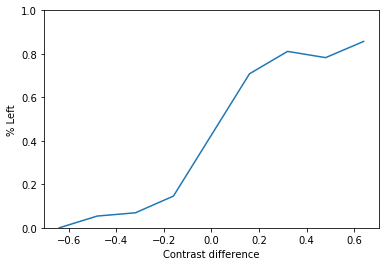

In [6]:
plot_psychometric(data)

In [7]:
choice, stim = get_choice_stim(folder + filename)
#ntrials = len(choice)


In [8]:
timeouts = np.where(choice == 5)
corr = np.where((choice != 5) & (stim == choice))
incorr = np.where((choice != 5) & (stim != choice))
left = np.where(stim == 1)
right = np.where(stim == 2)

In [9]:
# Make a design matrix
currchoice = choice[1:]
currstim = stim[1:]
prevchoice = choice[:-1]
prevstim = stim[:-1]
prev_reward = prevchoice * prevstim
prev_choiceXrew = prevchoice * prev_reward

y_b = currchoice[(currchoice != 5) & (prevchoice != 5)] - 1
X = np.vstack([currstim, prev_reward, prevchoice, prev_reward, prev_choiceXrew]).T
X_b = X[(currchoice != 5) & (prevchoice != 5),:] - 1

# Do logistic regression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial').fit(X_b, y_b)

# Print the coefficients
print clf.coef_, clf.intercept_

[[ 1.03473932 -0.56567345 -0.11402591 -0.56567345  0.37176831]] [-0.36614981]


In [10]:
def find_logistic_coefs(folder):
    '''Given a folder, find the logistic regression result for 
    each file in the folder'''
    files = glob.glob(folder + '\\*.mat')
    coeflst = []
    for file in files:
        print file
        choice, stim = get_choice_stim(file)
        
        timeouts = np.where(choice == 5)
        corr = np.where((choice != 5) & (stim == choice))
        incorr = np.where((choice != 5) & (stim != choice))
        left = np.where(stim == 1)
        right = np.where(stim == 2)

        # Make a design matrix
        currchoice = choice[1:]
        currstim = stim[1:]
        prevchoice = choice[:-1]
        prevstim = stim[:-1]
        prev_reward = prevchoice * prevstim
        prev_choiceXrew = prevchoice * prev_reward

        y_b = currchoice[(currchoice != 5) & (prevchoice != 5)] - 1
        X = np.vstack([currstim, prev_reward, prevchoice, prev_reward, prev_choiceXrew]).T
        X_b = X[(currchoice != 5) & (prevchoice != 5),:] - 1

        if len(np.unique(y_b)) < 2:
            continue
        # Do logistic regression
        clf = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='multinomial').fit(X_b, y_b)

        # Print the coefficients
        coeflst.append(clf.coef_)
        print clf.coef_, clf.intercept_
        
    return coeflst

def plot_all_in_folder(folder):
    '''Given a folder name, plot the psychometric curve for each file in the folder'''
    files = glob.glob(folder + '\\*.mat')
    coeflst = []
    for file in files:
        print file
        data = sp.loadmat(file)
        choice, stim = get_choice_stim(file)
        print choice
        if len(np.unique(choice)) < 2:
            continue
        plot_psychometric(data)

C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181001_trackball_0096.mat
[2 2 1 5 5 5 2 2 5 2 2 2 1 2 2 1 2 2 1 1 1 2 1 1 2 1 1 2 1 1 2 2 2 1 2 2 2
 2 1 2 1 2 5 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 1 2 2 2 1 2 2 1 1
 2 2 1 2 1 1 1 2 1 2 2 1 2 1 1 2 2 1 2 2 2 1 2 5 2 5 5 2 2 2 1 2 2 2 1 2 2
 2 1 1 1 2 2 1 2 1 2 1 1 2 2 1 2 1 2 2 2 1 1 5 2 2 1 1 2 2 1 1 2 1 5 1 2 1
 2 2 2 1 2 1 1 1 1 2 2 2 2 1 2 2 1 1 2 2 1 2 1 2 2 2 5 5 1 2 2 2 2 2 2 2 1
 2 2 2 1 1 2 1 1 1 2 1 2 1 1 2 2 2 2 2 1 2 2 1]
[-0.64 -0.48 -0.32 -0.16  0.16  0.32  0.48  0.64]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181002_trackball_0096.mat
[1 2 5 2 2 1 1 1 2 5 2 2 2 1 2 1 2 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 5 1 2 1
 1 2 1 2 1 2 1 1 5 5 2 1 2 1 1 5 1 2 2 2 2 2 2 1 1 2 5 2 1 2 2 2 5 1 2 1 2
 2 1 2 2 1 1 2 2 5 2 2 5 1 2 2 2 5 2 2 1 2 2 1 2 2 1 1 2 1 5 5 2 1 2 2 2 1
 2 5 2 2 2 2 2 2 1 2 5 2 2 2 2 5 5 2 2 1 2 2 2 5 2 2 2 5 5 2 1 2 2 2 5 2 5
 5 2 5 5 2 5 2 2 2 2 2 1 5 2 1 2 2 5 2 

[2 2 5 5 5 2 2 5 1 2 2 5 1 5 2 1 5 2 2 5 2 5 1 1 2 1 1 1 1 1 2 2 2 1 2 2 2
 5 2 2 1 1 2 1 1 2 2 5 5 2 2 2 5 1 2 2 1 5 2 5 1 5 2 2 2 1 5 5 2 1 2 2 5 2
 2 2 5 2 1 1 5 2 5 2 1 5 2 2 1 1 2 2 2 2 2 5 5 2 2 2 1 2 2 5 1 1 1 1 1 5 2
 2 1 1 5 2 5 1 2 1 2 1 1 1 2 5 2 1 1 2 5 5 5 2 2 5 2 5 2 2 1 2 1 2 1 1 2 5
 5 5 2 5 2 5 1 5 5 1 5 2 2 1 1 2 1 1 2 1 1 2 2 2 2 2 1 1 1 2 2 5 2 2 5 1 5
 5 2 2 2 1 5 1 5 2 5 5 2 5 5 2 5 5 2 5 1 2 2 5 5 2 5 2 2 2 5 5 5 5 5 2 2 2
 5 2 2 5 5 2 5 2 5 5 5 2 2 2 5 5 5 5 5 5 5 5 5 5]
[-0.64 -0.48 -0.32 -0.16  0.16  0.32  0.48  0.64]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181017_trackball_0096.mat
[5 2 5 1 2 1 2 1 1 5 1 1 1 2 2 2 5 2 2 5 5 2 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2
 1 2 2 1 5 2 2 2 1 2 1 2 1 2 1 2 2 2 1 1 2 1 1 2 1 2 1 1 2 5 1 5 5 2 1 5 2
 2 1 2 5 1 2 2 2 1 5 5 2 2 2 2 2 1 1 2 1 1 2 2 1 1 1 2 1 1 2 2 2 1 2 1 1 1
 2 2 1 1 1 2 5 1 2 1 2 1 2 1 2 1 2 2 2 5 2 2 2 2 1 1 2 2 2 1 1 1 2 2 5 1 2
 2 2 1 2 1 2 1 2 2 2 2 2 5 5 5 2 2 2 2 1 2 5 1 2 2 2 1 5

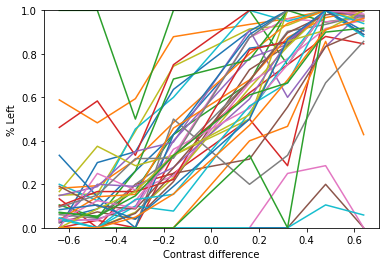

In [11]:
plot_all_in_folder(folder2)

In [12]:
find_logistic_coefs(folder2)

C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181001_trackball_0096.mat
[[ 1.74939613 -0.17493257  0.03243237 -0.17493257  0.16812031]] [-0.73213339]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181002_trackball_0096.mat
[[ 1.19343014 -0.00345065  0.59846776 -0.00345065 -0.06288923]] [0.08662983]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181003_trackball_0096.mat
[[-0.12531537  0.03890327 -0.13198203  0.03890327 -0.12294233]] [1.47329788]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181003_trackball_0096b.mat
[[ 1.35528696e+00 -1.62187695e-01  9.97237718e-01 -1.62187695e-01
   1.27520914e-03]] [-0.97915627]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181003_trackball_0096c.mat
[[ 0.55420645  0.38583781 -0.15803438  0.38583781 -0.24629969]] [-1.66078592]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Oct2018\20181003_trackball_0096d.mat
C:\Users\Sur lab\Dropbo

[array([[ 1.74939613, -0.17493257,  0.03243237, -0.17493257,  0.16812031]]),
 array([[ 1.19343014, -0.00345065,  0.59846776, -0.00345065, -0.06288923]]),
 array([[-0.12531537,  0.03890327, -0.13198203,  0.03890327, -0.12294233]]),
 array([[ 1.35528696e+00, -1.62187695e-01,  9.97237718e-01,
         -1.62187695e-01,  1.27520914e-03]]),
 array([[ 0.55420645,  0.38583781, -0.15803438,  0.38583781, -0.24629969]]),
 array([[ 0.27929074, -0.18943566,  0.16161787, -0.18943566,  0.45703583]]),
 array([[ 0.86974832, -0.08697027, -0.01455744, -0.08697027, -0.18849797]]),
 array([[ 1.6758605 , -0.0833914 ,  0.20046381, -0.0833914 ,  0.05357827]]),
 array([[ 4.08398067e-01, -4.40814868e-01, -1.05892862e-06,
         -4.40814868e-01, -4.40819104e-01]]),
 array([[ 1.09164844, -0.47671494,  0.20784079, -0.47671494,  0.35464824]]),
 array([[ 1.80629241e+00, -2.21182778e-01, -1.03044536e-03,
         -2.21182778e-01,  1.84793880e-01]]),
 array([[ 1.74186476,  0.18959134,  0.07021387,  0.18959134, -0.12

In [13]:
find_logistic_coefs(folder)

C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Dec2018\20181206_trackball_0096.mat
[[ 1.01579903 -0.52316192 -0.1568255  -0.52316192  0.46210277]] [-0.7742376]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Dec2018\20181207_trackball_0096.mat
[[ 0.8530159  -0.44397031 -0.41404057 -0.44397031  0.37347413]] [-0.28880419]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Dec2018\20181208_trackball_0096.mat
[[ 1.08483187 -0.59748146 -0.14129692 -0.59748146  0.37716053]] [-0.4047027]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Dec2018\20181209_trackball_0096.mat
[[ 0.95719262 -0.53961949  0.04445804 -0.53961949  0.29551347]] [-0.2291866]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\96\Dec2018\20181211_trackball_0096.mat
[[ 1.03473932 -0.56567345 -0.11402591 -0.56567345  0.37176831]] [-0.36614981]


[array([[ 1.01579903, -0.52316192, -0.1568255 , -0.52316192,  0.46210277]]),
 array([[ 0.8530159 , -0.44397031, -0.41404057, -0.44397031,  0.37347413]]),
 array([[ 1.08483187, -0.59748146, -0.14129692, -0.59748146,  0.37716053]]),
 array([[ 0.95719262, -0.53961949,  0.04445804, -0.53961949,  0.29551347]]),
 array([[ 1.03473932, -0.56567345, -0.11402591, -0.56567345,  0.37176831]])]

In [14]:
find_logistic_coefs(folder3)

C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\97\Dec2018\20181206_trackball_0097.mat
[[ 0.1122934  -0.09981158  1.5803873  -0.09981158 -0.07490711]] [-0.1304887]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\97\Dec2018\20181207_trackball_0097.mat
[[ 0.60718475 -0.3120459   0.59141477 -0.3120459   0.27868198]] [-0.67896906]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\97\Dec2018\20181208_trackball_0097.mat
[[ 0.35488326 -0.16985326  0.18762236 -0.16985326  0.20020142]] [-0.74549562]
C:\Users\Sur lab\Dropbox (MIT)\trackball-behavior\Data\97\Dec2018\20181211_trackball_0097.mat
[[ 0.18318101 -0.08812501 -0.03355726 -0.08812501  0.1020013 ]] [-0.89527034]


[array([[ 0.1122934 , -0.09981158,  1.5803873 , -0.09981158, -0.07490711]]),
 array([[ 0.60718475, -0.3120459 ,  0.59141477, -0.3120459 ,  0.27868198]]),
 array([[ 0.35488326, -0.16985326,  0.18762236, -0.16985326,  0.20020142]]),
 array([[ 0.18318101, -0.08812501, -0.03355726, -0.08812501,  0.1020013 ]])]